# Ejercicio Ridge, Lasso y ElasticNet
Para este ejercicio vas a trabajar con datos de ventas de una empresa que fabrica muebles en España. Esta empresa es una Pyme que demanda conocer de antemano qué ingresos va a tener cada mes, ya que necesita pedir un anticipio a su entidad financiera de cara a poder abastecerse de materia prima al comenzar el mes. Como desconoce cuánto tiene que pedir, tira al alza y acaba pagando muchos intereses. El objetivo es reducir estos gastos.

En las bases de datos de la empresa constan todos los gastos en publicidad y ventas, para cada uno de los meses desde su fundación (hace más de 15 años).

Dado que los presupuestos de marketing se cierran al principio de cada mes, la empresa necesita un modelo predictivo que le anticipe las ventas que conseguirá a final de mes en función de los gastos que realizará en marketing.

Para ello tendrás que utilizar tanto modelos de regresión normales, como regularizados.

1. Carga los datos y realiza un pequeño análisis exploratorio. Mira a ver cómo se relaciona las ventas con el resto de variables.
2. Crea varios modelos y modifica los hiperparámetros necesarios para mejorar el performance del modelo.

## Import libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Exploratory Data Analysis 

In [2]:
DATAPATH = "Advertising.csv"

data = pd.read_csv(DATAPATH)
data.drop(columns = ["Unnamed: 0"], inplace = True)
data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22100.0
1,44.5,39.3,45.1,10400.0
2,17.2,45.9,69.3,9300.0
3,151.5,41.3,58.5,18500.0
4,180.8,10.8,58.4,12900.0


In [3]:
len(data)

200

In [4]:
data.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [5]:
def scatter_plot(feature, target):
    plt.figure(figsize=(16, 8))
    plt.scatter(
        data[feature],
        data[target],
        c = "black"
    )
    plt.xlabel("Money spent on {} ads ($)".format(feature))
    plt.ylabel("Sales")
    plt.show()

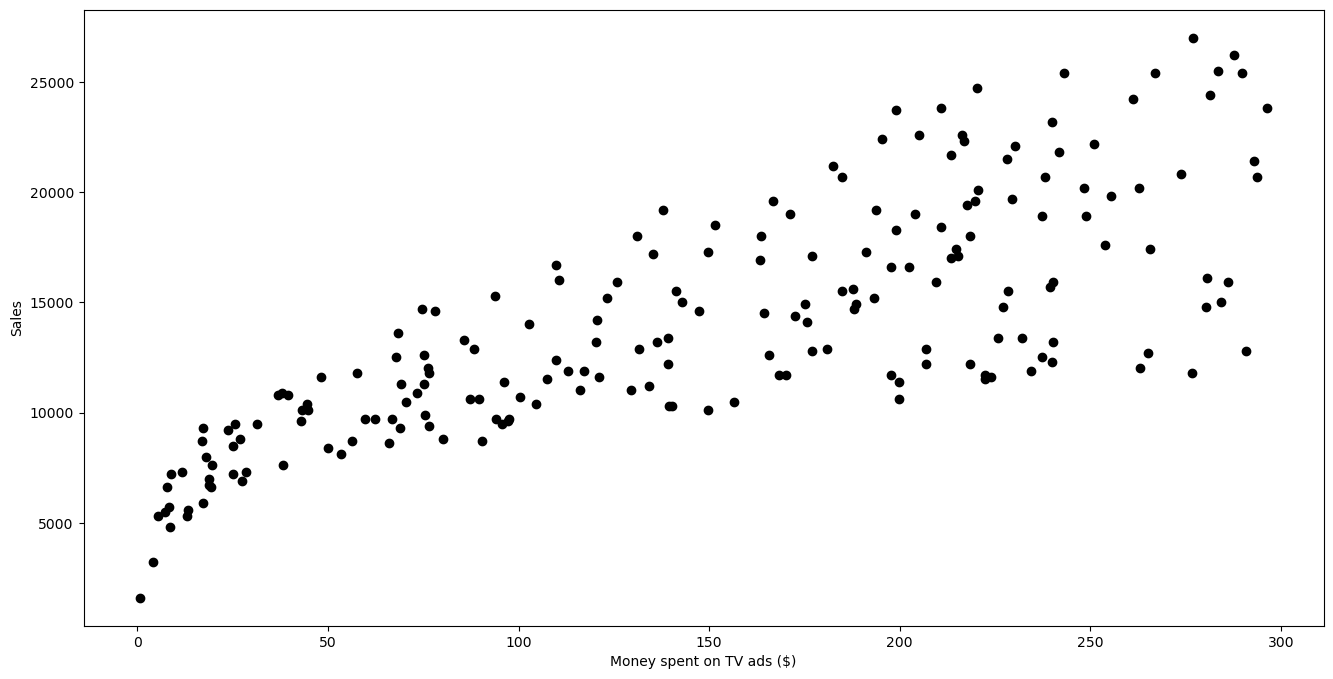

In [6]:
scatter_plot("TV", "sales")

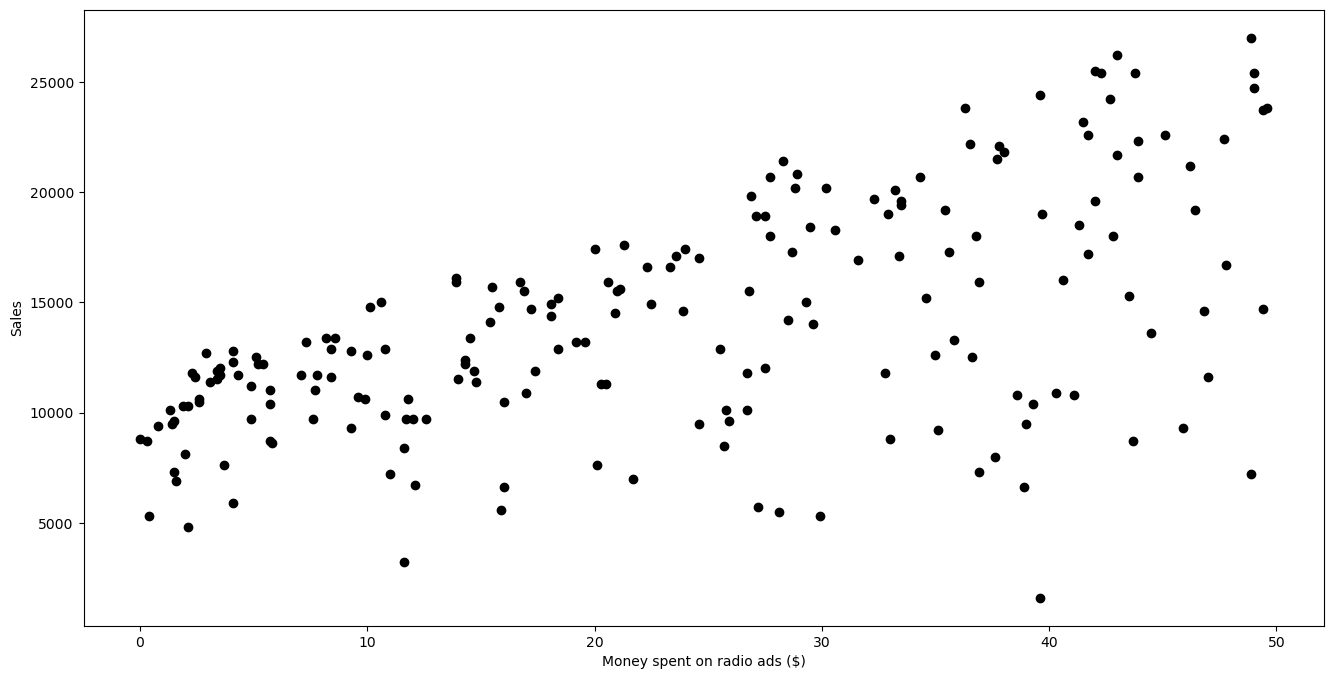

In [7]:
scatter_plot("radio", "sales")

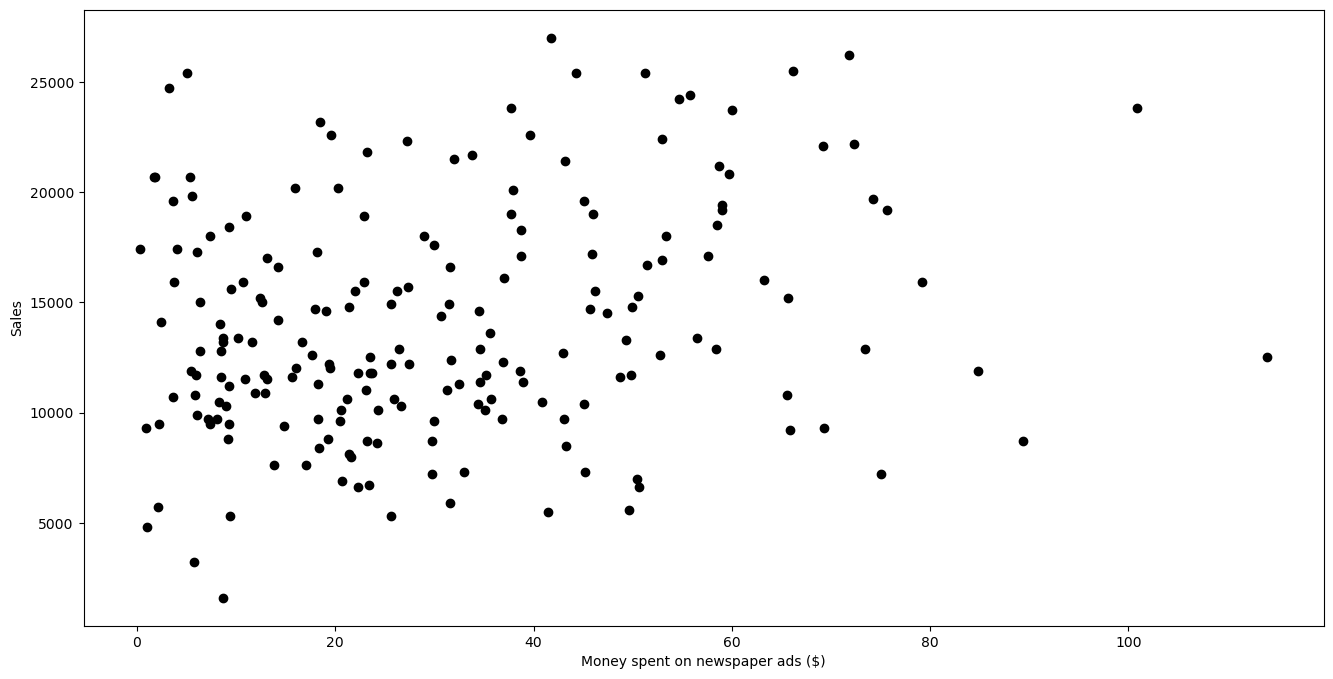

In [8]:
scatter_plot("newspaper", "sales")

In [9]:
data.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


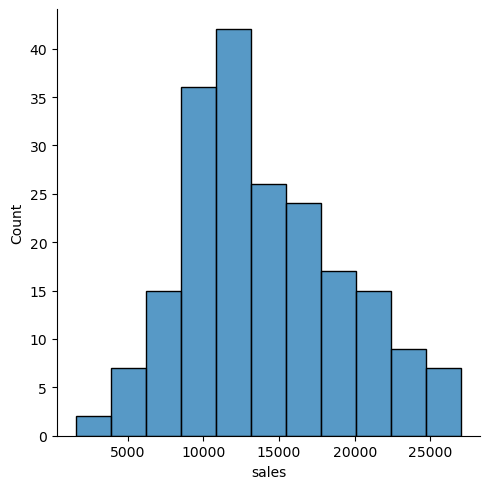

In [10]:
import seaborn as sns
sns.displot(data['sales'])

## Modelling 

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['sales']),
                                                    data['sales'],
                                                    test_size=0.20,
                                                    random_state=42)

### Multiple linear regression

In [12]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

print("MSE: ", mean_squared_error(y_test, lin_reg.predict(X_test)))

# mean_squared_error(y_true, y_pred)
# mi_modelo.score(X_train, y_train) --> y_pred, y_true

print("RMSE: ", np.sqrt(mean_squared_error(y_test, lin_reg.predict(X_test))))

MSE:  3174097.353976104
RMSE:  1781.59966153345


### Ridge regression 

In [13]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=20)
ridge.fit(X_train, y_train)

print("MSE: ", mean_squared_error(y_test, ridge.predict(X_test)))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, ridge.predict(X_test))))
# ¡¡aquí!!

MSE:  3174049.817253042
RMSE:  1781.5863204607972


In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

ridge = Ridge()
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}
                        # 1 * 10 ^(0) = 1
                        # 5 * 10 ^2 = 500
                        # 7 * 10 (-3) = 7 * 0.1
                        # 10 ^(-3) = 1 / (10^3) = 1 / 1000 = 0.001
                        # 0.00000001 , 0.00000002 
                    
ridge_regressor = GridSearchCV(ridge, parameters, scoring = "neg_mean_squared_error", cv = 5, error_score=np.nan)
ridge_regressor.fit(X_train, y_train)                        

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]},
             scoring='neg_mean_squared_error')

In [16]:
ridge_regressor.best_params_

{'alpha': 1e-15}

In [17]:
ridge_regressor.best_score_

-2943392.602590043

### Lasso 

In [18]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1)
lasso.fit(X_train, y_train)

print("MSE: ", mean_squared_error(y_test, lasso.predict(X_test)))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, lasso.predict(X_test))))

MSE:  3174061.443031306
RMSE:  1781.5895832181177


In [19]:
lasso = Lasso()
parameters = {'alpha': [1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5, error_score=np.nan)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 1, 5, 10, 20]},
             scoring='neg_mean_squared_error')

In [20]:
lasso_regressor.best_params_

{'alpha': 20}

In [21]:
lasso_regressor.best_score_

-2942763.3458425356

### ElasticNet

In [22]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet(alpha=100, l1_ratio=0.99)
elastic.fit(X_train, y_train)

print("MSE: ", mean_squared_error(y_test, elastic.predict(X_test)))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, elastic.predict(X_test))))

MSE:  3170500.9924035035
RMSE:  1780.5900686018394


In [23]:
%%time
from sklearn.linear_model import ElasticNet

elastic = ElasticNet()

parameters = {'alpha': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.1, 1.0, 10.0, 50.0, 100.0],
             'l1_ratio': np.arange(0.01, 1, 0.1)}

elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error', cv = 5, error_score=np.nan)

elastic_regressor.fit(X_train, y_train)

CPU times: total: 7.36 s
Wall time: 10.8 s


GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 0.1, 1.0,
                                   10.0, 50.0, 100.0],
                         'l1_ratio': array([0.01, 0.11, 0.21, 0.31, 0.41, 0.51, 0.61, 0.71, 0.81, 0.91])},
             scoring='neg_mean_squared_error')

In [24]:
elastic_regressor.best_params_

{'alpha': 10.0, 'l1_ratio': 0.91}

In [25]:
elastic_regressor.best_score_

-2943339.39782069

### StandardScaler

In [26]:
%%time
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

elastic = ElasticNet()

parameters = {'alpha': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.1, 1.0, 10.0, 50.0, 100.0],
             'l1_ratio': np.arange(0.01, 0.1, 1)}
elastic_regressor = GridSearchCV(elastic, parameters, scoring="neg_mean_squared_error", cv = 5, error_score=np.nan)

elastic_regressor.fit(X_train_scaled, y_train)

CPU times: total: 312 ms
Wall time: 560 ms


GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 0.1, 1.0,
                                   10.0, 50.0, 100.0],
                         'l1_ratio': array([0.01])},
             scoring='neg_mean_squared_error')

In [27]:
elastic_regressor.best_score_

-2943393.6136348573

In [28]:
elastic_regressor.best_params_

{'alpha': 1e-05, 'l1_ratio': 0.01}

In [29]:
elastic_regressor.best_estimator_

ElasticNet(alpha=1e-05, l1_ratio=0.01)

In [30]:
elastic.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'l1_ratio': 0.5,
 'max_iter': 1000,
 'normalize': 'deprecated',
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [31]:
elastic_regressor.get_params()

{'cv': 5,
 'error_score': nan,
 'estimator__alpha': 1.0,
 'estimator__copy_X': True,
 'estimator__fit_intercept': True,
 'estimator__l1_ratio': 0.5,
 'estimator__max_iter': 1000,
 'estimator__normalize': 'deprecated',
 'estimator__positive': False,
 'estimator__precompute': False,
 'estimator__random_state': None,
 'estimator__selection': 'cyclic',
 'estimator__tol': 0.0001,
 'estimator__warm_start': False,
 'estimator': ElasticNet(),
 'n_jobs': None,
 'param_grid': {'alpha': [1e-05,
   0.0001,
   0.001,
   0.01,
   0.1,
   0.1,
   1.0,
   10.0,
   50.0,
   100.0],
  'l1_ratio': array([0.01])},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': 'neg_mean_squared_error',
 'verbose': 0}

In [33]:
elastic_regressor.cv_results_

{'mean_fit_time': array([0.0133954 , 0.00736117, 0.00320797, 0.00799522, 0.00540233,
        0.00240059, 0.00320101, 0.00327058, 0.00339341, 0.00339994]),
 'std_fit_time': array([0.01196029, 0.00642473, 0.00240255, 0.00660559, 0.00287067,
        0.00102028, 0.00213296, 0.00146722, 0.00101062, 0.00101984]),
 'mean_score_time': array([0.00199823, 0.0069932 , 0.00340047, 0.0018013 , 0.00639849,
        0.00219941, 0.00100231, 0.00160427, 0.00452466, 0.00268431]),
 'std_score_time': array([6.32012036e-04, 9.01533365e-03, 2.73701197e-03, 7.39675348e-04,
        5.00149137e-03, 9.79424185e-04, 6.34748890e-06, 7.99189738e-04,
        5.54135094e-03, 2.00808747e-03]),
 'param_alpha': masked_array(data=[1e-05, 0.0001, 0.001, 0.01, 0.1, 0.1, 1.0, 10.0, 50.0,
                    100.0],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_l1_ratio': masked_array(data=[0.01, 0.01,